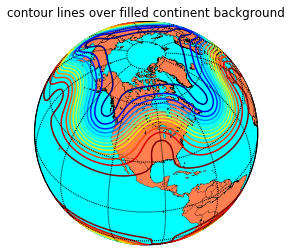

In [20]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
# set up orthographic map projection with
# perspective of satellite looking down at 50N, 100W.
# use low resolution coastlines.
map = Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral',lake_color='aqua')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
# make up some data on a regular lat/lon grid.
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)
# compute native map projection coordinates of lat/lon grid.
x, y = map(lons*180./np.pi, lats*180./np.pi)
# contour data over the map.
cs = map.contour(x,y,wave+mean,15,linewidths=1.5)
plt.title('contour lines over filled continent background')
plt.show()

# 2.A)

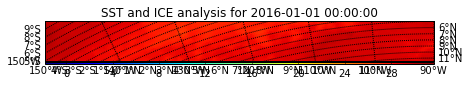

In [96]:
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset, date2index
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
date = datetime(2016,1,1,0) # date to plot.
# open dataset.
dataset = \
Dataset('http://www.ncdc.noaa.gov/thredds/dodsC/OISST-V2-AVHRR_agg')
timevar = dataset.variables['time']
timeindex = date2index(date,timevar) # find time index for desired date.
# read sst.  Will automatically create a masked array using
# missing_value variable attribute. 'squeeze out' singleton dimensions.
sst = dataset.variables['sst'][timeindex,:].squeeze()
# read ice.
ice = dataset.variables['ice'][timeindex,:].squeeze()
# read lats and lons (representing centers of grid boxes).
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]
lons, lats = np.meshgrid(lons,lats)
# create figure, axes instances.
fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
# create Basemap instance.
# coastlines not used, so resolution set to None to skip
# continent processing (this speeds things up a bit)
m = Basemap(llcrnrlon=-150.,llcrnrlat=-5.,urcrnrlon=-90.,urcrnrlat=5.,
            projection='lcc',lat_1=20.,lat_2=40.,lon_0=-90.,
            resolution ='l',area_thresh=1000.)
# draw line around map projection limb.
# color background of map projection region.
# missing values over land will show up this color.
    m.drawmapboundary(fill_color='0.3')
# plot sst, then ice with pcolor
im1 = m.pcolormesh(lons,lats,sst,shading='flat',cmap=plt.cm.jet,latlon=True)
im2 = m.pcolormesh(lons,lats,ice,shading='flat',cmap=plt.cm.gist_gray,latlon=True)
# draw parallels and meridians, but don't bother labelling them.
m.drawparallels(np.arange(-90.,90.,1.),labels=[1,1,0,1])
m.drawmeridians(np.arange(-180.,180.,10.),labels=[1,1,0,1])
# add colorbar
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
# add a title.
ax.set_title('SST and ICE analysis for %s'%date)
plt.show()

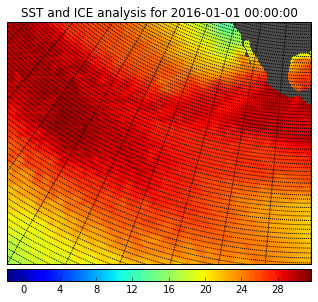

In [112]:
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset, date2index
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
date = datetime(2016,1,1,0) # date to plot.
# open dataset.
dataset = \
Dataset('http://www.ncdc.noaa.gov/thredds/dodsC/OISST-V2-AVHRR_agg')
timevar = dataset.variables['time']
timeindex = date2index(date,timevar) # find time index for desired date.
# read sst.  Will automatically create a masked array using
# missing_value variable attribute. 'squeeze out' singleton dimensions.
sst = dataset.variables['sst'][timeindex,:].squeeze()
# read ice.
ice = dataset.variables['ice'][timeindex,:].squeeze()
# read lats and lons (representing centers of grid boxes).
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]
lons, lats = np.meshgrid(lons,lats)
# create figure, axes instances.
fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
# create Basemap instance.
# coastlines not used, so resolution set to None to skip
# continent processing (this speeds things up a bit)
m = Basemap(llcrnrlon=-150.,llcrnrlat=-40.,urcrnrlon=-90.,urcrnrlat=40.,
            projection='lcc',lat_1=20.,lat_2=40.,lon_0=-90.,
            resolution ='l',area_thresh=1000.)
# draw line around map projection limb.
# color background of map projection region.
# missing values over land will show up this color.
m.drawmapboundary(fill_color='0.3')
# plot sst, then ice with pcolor
im1 = m.pcolormesh(lons,lats,sst,shading='flat',cmap=plt.cm.jet,latlon=True)
im2 = m.pcolormesh(lons,lats,ice,shading='flat',cmap=plt.cm.gist_gray,latlon=True)
# draw parallels and meridians, but don't bother labelling them.
m.drawparallels(np.arange(-90.,90.,1.))
m.drawmeridians(np.arange(-180.,180.,10.))
# add colorbar
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
# add a title.
ax.set_title('SST and ICE analysis for %s'%date)
plt.show()

# 2. B)

38
38


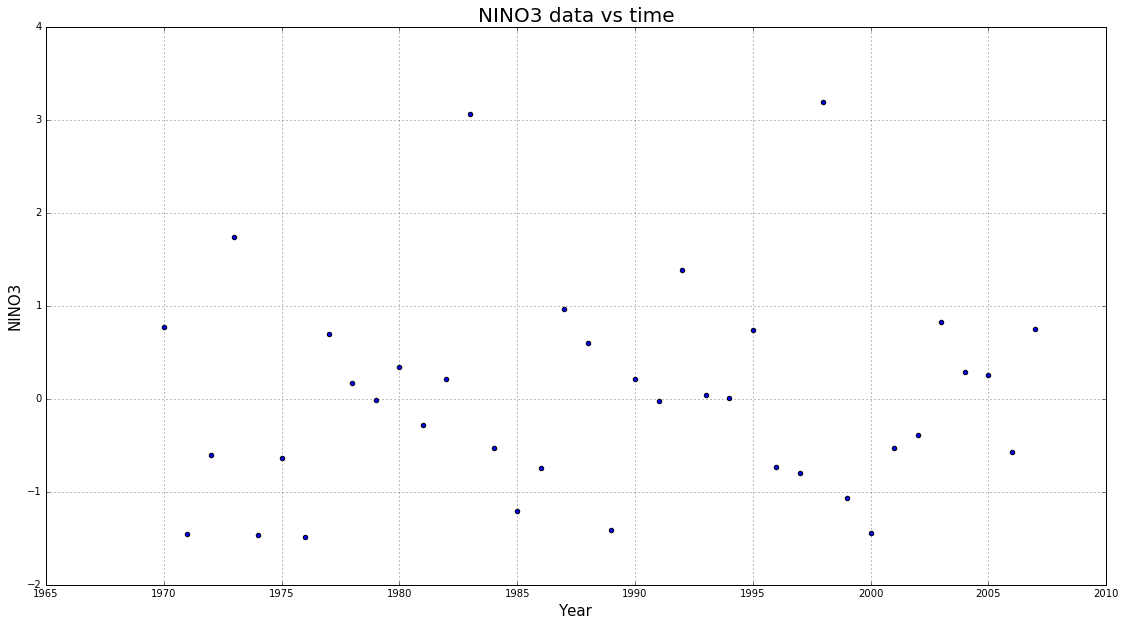

In [89]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data='/Users/noahknoblauch/PHY154/calidata_final.dat'
calidata=np.loadtxt(data)

NINO3=calidata[:,4]
year=calidata[:,0]

Temperature=calidata[:,1]
percepitation=calidata[:,2]
snow=calidata[:,3]


print len(year)

print len(NINO3)

plt.figure(figsize=(19,10))
plt.scatter(year,NINO3)
plt.ylabel('NINO3',fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.title('NINO3 data vs time',fontsize=20)
plt.grid()
plt.show()


# 2. C)

In [120]:
    
topyear=range(len(year))
print "top five years:"
for i in range(len(NINO3)):
        if NINO3[i]>0.9:
            print year[i]



top five years:
1973.0
1983.0
1987.0
1992.0
1998.0


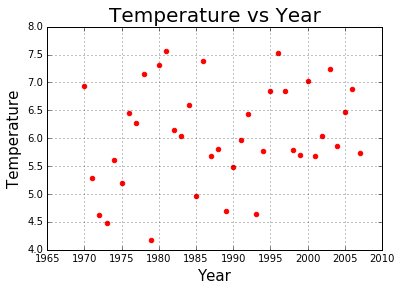

In [109]:

plt.scatter(year,Temperature,color='r')
plt.title('Temperature vs Year',fontsize=20)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Temperature',fontsize=15)
plt.grid()
plt.show()

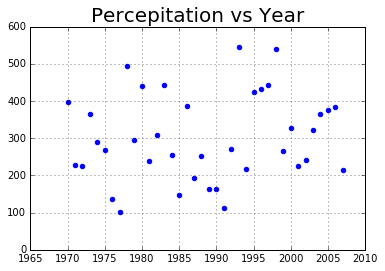

In [98]:
    plt.scatter(year,percepitation,color='blue')
plt.title('Percepitation vs Year',fontsize=20)

plt.grid()
plt.show()

# 2. D)
#
# The top 5 years of el nino only cooralte to a couple of years of high temperature and perceptiation

# 2. E)

In [124]:
snowyear=year[10:len(year)]
snowdata=snow[10:len(snow)]
snowNINO=NINO3[10:len(snow)]


from scipy.stats.stats import pearsonr
print "Temperature Coorelation",pearsonr(Temperature, NINO3),'No correlation'
print "Percepitation Coorelation",pearsonr(percepitation, NINO3), 'some correlation'
print "Snow Coorelation",pearsonr(snowdata, snowNINO), 'little correlation'

print ' '
print 'Snow and percepitation are not equally anti correlated with the NINO3'
print' '

print 'It does not seem that these results are consistent with the maps provided'


Temperature Coorelation (0.0051124458580692608, 0.9756981034908927) No correlation
Percepitation Coorelation (0.37712170125989769, 0.019596097409072206) some correlation
Snow Coorelation (0.050311156472695281, 0.79930643022487002) little correlation
 
Snow and percepitation are not equally anti correlated with the NINO3
 
It does not seem that these results are consistent with the maps provided


# 2. F)

graphic showing sea surface temperatures with a warming trend moving North.  It looks like we are in a neutral event